In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# mac용 한글 폰트 지정
from matplotlib import rc

rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False  

In [52]:
# eda/seling_count 폴더내에서 data/.csv 접근
df_seling = pd.read_csv('../../data/매출_자치구.csv')

In [53]:
# No missing values - total 39975 row
df_seling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39975 entries, 0 to 39974
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   기준_년분기_코드        39975 non-null  int64  
 1   자치구_코드           39975 non-null  int64  
 2   자치구_코드_명         39975 non-null  object 
 3   서비스_업종_코드        39975 non-null  object 
 4   서비스_업종_코드_명      39975 non-null  object 
 5   당월_매출_금액         39975 non-null  float64
 6   당월_매출_건수         39975 non-null  float64
 7   주중_매출_금액         39975 non-null  float64
 8   주말_매출_금액         39975 non-null  float64
 9   월요일_매출_금액        39975 non-null  float64
 10  화요일_매출_금액        39975 non-null  float64
 11  수요일_매출_금액        39975 non-null  float64
 12  목요일_매출_금액        39975 non-null  float64
 13  금요일_매출_금액        39975 non-null  float64
 14  토요일_매출_금액        39975 non-null  float64
 15  일요일_매출_금액        39975 non-null  float64
 16  시간대_00_06_매출_금액  39975 non-null  float64
 17  시간대_06_11_매출

In [54]:
# 년분기 - 20191 ~ 20252
df_seling.describe()

,기준_년분기_코드,자치구_코드,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
count,39975.000000,39975.000000,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,...,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04,3.997500e+04
mean,20220.096635,11417.490807,1.553588e+10,5.749521e+05,1.181356e+10,3.722323e+09,2.294541e+09,2.333635e+09,2.299288e+09,2.322355e+09,...,1.546675e+05,4.987876e+04,2.921733e+05,2.603265e+05,9.668697e+03,1.152295e+05,1.260884e+05,1.122582e+05,1.019250e+05,8.732978e+04
std,18.764856,186.697606,4.679056e+10,1.482439e+06,3.402004e+10,1.492424e+10,6.541812e+09,6.738035e+09,6.622212e+09,6.760661e+09,...,3.815019e+05,1.762930e+05,8.035575e+05,6.478367e+05,4.032344e+04,3.537427e+05,3.692508e+05,2.905851e+05,2.511394e+05,2.936379e+05
min,20191.000000,11110.000000,7.135000e+03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,20203.000000,11260.000000,1.197476e+09,1.463000e+04,9.055360e+08,2.127424e+08,1.702548e+08,1.694307e+08,1.699748e+08,1.688579e+08,...,3.929500e+03,8.700000e+01,6.744000e+03,5.986000e+03,2.100000e+01,1.080000e+03,2.378000e+03,2.973000e+03,2.770000e+03,1.953500e+03
50%,20221.000000,11410.000000,4.114511e+09,7.159500e+04,3.053526e+09,8.900238e+08,5.872360e+08,5.846100e+08,5.940885e+08,6.005562e+08,...,2.079700e+04,1.328000e+03,3.688800e+04,3.025200e+04,3.890000e+02,7.962000e+03,1.117300e+04,1.414700e+04,1.453300e+04,9.591000e+03
75%,20234.000000,11560.000000,1.251953e+10,3.641125e+05,9.621754e+09,2.737414e+09,1.834212e+09,1.876221e+09,1.897478e+09,1.906856e+09,...,1.096030e+05,1.693950e+04,1.653120e+05,1.644595e+05,4.634000e+03,5.662850e+04,6.318850e+04,6.623200e+04,6.380200e+04,4.710300e+04
max,20252.000000,11740.000000,1.399137e+12,2.716973e+07,9.281984e+11,6.277519e+11,2.002835e+11,1.875084e+11,1.971409e+11,2.059724e+11,...,5.927010e+06,3.300952e+06,1.514807e+07,1.446824e+07,2.790816e+06,7.719704e+06,7.260442e+06,5.673264e+06,5.913245e+06,1.498564e+07


In [55]:
col_drop = ['자치구_코드', '서비스_업종_코드', '주중_매출_금액', '주말_매출_금액', '주중_매출_건수', '주말_매출_건수']
df_seling = df_seling.drop(col_drop, axis=1)
df_seling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39975 entries, 0 to 39974
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   기준_년분기_코드        39975 non-null  int64  
 1   자치구_코드_명         39975 non-null  object 
 2   서비스_업종_코드_명      39975 non-null  object 
 3   당월_매출_금액         39975 non-null  float64
 4   당월_매출_건수         39975 non-null  float64
 5   월요일_매출_금액        39975 non-null  float64
 6   화요일_매출_금액        39975 non-null  float64
 7   수요일_매출_금액        39975 non-null  float64
 8   목요일_매출_금액        39975 non-null  float64
 9   금요일_매출_금액        39975 non-null  float64
 10  토요일_매출_금액        39975 non-null  float64
 11  일요일_매출_금액        39975 non-null  float64
 12  시간대_00_06_매출_금액  39975 non-null  float64
 13  시간대_06_11_매출_금액  39975 non-null  float64
 14  시간대_11_14_매출_금액  39975 non-null  float64
 15  시간대_14_17_매출_금액  39975 non-null  float64
 16  시간대_17_21_매출_금액  39975 non-null  float64
 17  시간대_21_24_매출

In [56]:
print('포함된 자치구 개수: ', df_seling['자치구_코드_명'].nunique(),'\n') # 25개 자치구
print('각 자치구의 데이터개수:\n', df_seling['자치구_코드_명'].value_counts())

포함된 자치구 개수:  25 

각 자치구의 데이터개수:
 자치구_코드_명
강남구     1637
중구      1635
마포구     1628
강동구     1624
동작구     1623
영등포구    1620
관악구     1619
강서구     1612
용산구     1606
서초구     1604
동대문구    1603
송파구     1596
중랑구     1594
구로구     1590
성북구     1587
강북구     1587
성동구     1587
도봉구     1586
은평구     1586
광진구     1586
노원구     1583
금천구     1582
서대문구    1574
종로구     1566
양천구     1560
Name: count, dtype: int64


In [57]:
print('포함된 서비스 업종 개수:', df_seling['서비스_업종_코드_명'].nunique()) # 63개

포함된 서비스 업종 개수: 63


In [ ]:
# 분기별/자치구별 최고 매출 서비스 업종 시각화를 위한 df 저장
# 1. 결과를 저장할 빈 리스트 생성
all_quarters_top_services = []

# 2. 데이터프레임에 있는 모든 분기 목록을 중복 없이 가져와서 정렬
unique_quarters = sorted(df_seling['기준_년분기_코드'].unique())

# 3. for문을 사용해 각 분기별로 반복 작업 수행
for quarter in unique_quarters:
    # 현재 분기에 해당하는 데이터만 필터링
    df_q = df_seling[df_seling['기준_년분기_코드'] == quarter]
    
    # 자치구별로 그룹화하여 당월_매출_금액이 최대인 행의 인덱스를 찾기
    max_sales_idx = df_q.groupby('자치구_코드_명')['당월_매출_금액'].idxmax()
    
    # 위에서 찾은 인덱스를 사용하여 최고 매출 기록을 가진 행 전체를 선택
    top_services_q = df_seling.loc[max_sales_idx]
    
    # 결과를 리스트에 추가
    all_quarters_top_services.append(top_services_q)

# 4. 리스트에 저장된 모든 데이터프레임을 하나로 합치기
top_seling_df = pd.concat(all_quarters_top_services)

# 5. 최종 결과 확인
print(top_seling_df)

       기준_년분기_코드 자치구_코드_명 서비스_업종_코드_명      당월_매출_금액   당월_매출_건수     월요일_매출_금액  \
1041       20191      강남구        일반의원  3.036999e+11  1998779.0  4.980801e+10   
857        20191      강동구       한식음식점  7.823247e+10  2556387.0  8.771547e+09   
914        20191      강북구       한식음식점  6.177540e+10  1862035.0  6.745762e+09   
391        20191      강서구       한식음식점  9.512141e+10  2998272.0  1.134551e+10   
1210       20191      관악구       한식음식점  8.811827e+10  3206209.0  9.643674e+09   
...          ...      ...         ...           ...        ...           ...   
20366      20252      용산구  컴퓨터및주변장치판매  4.475035e+11  1943542.0  9.212529e+10   
20619      20252      은평구       한식음식점  1.022028e+11  2809940.0  1.237094e+10   
19940      20252      종로구       한식음식점  2.447033e+11  6054915.0  3.279257e+10   
26040      20252       중구       한식음식점  2.842446e+11  6086442.0  3.878205e+10   
26077      20252      중랑구       한식음식점  1.175950e+11  3114753.0  1.425047e+10   

          화요일_매출_금액     수요일_매출_금액     목

/var/folders/65/zhsxn8gj50ldq2qmstz0zqqm0000gn/T/ipykernel_6960/2239348602.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_heatmap_data = heatmap_data.replace(industry_to_num)


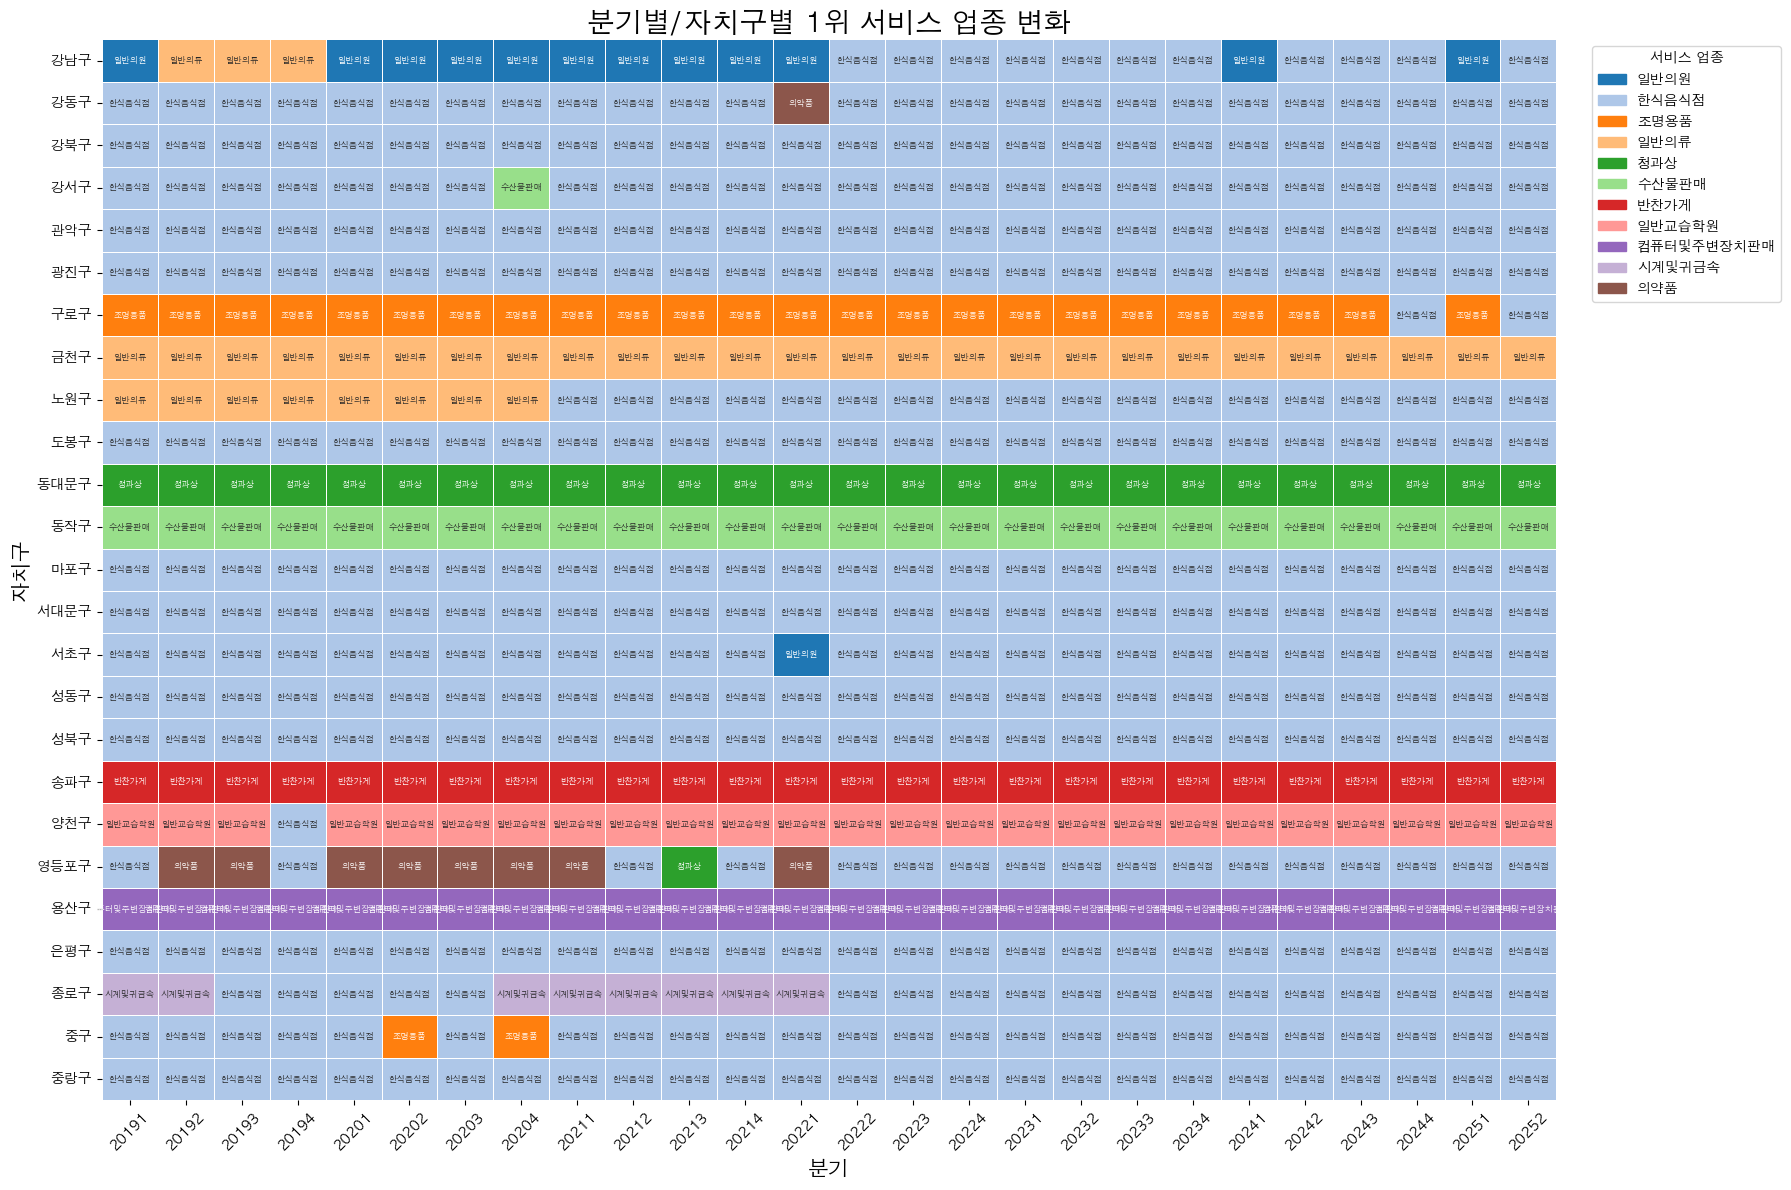

In [ ]:
# 분기별/자치구별 최고 매출 서비스 업종 시각화 - heatmap
# 당월 매출 금액 기준
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap


# 1. 데이터 피봇: 히트맵에 맞는 형태로 데이터 재구성
heatmap_data = top_seling_df.pivot_table(
    index='자치구_코드_명', 
    columns='기준_년분기_코드', 
    values='서비스_업종_코드_명',
    aggfunc='first' # 값이 하나이므로 first, min, max 등 아무거나 사용 가능
)

# 2. 업종 이름을 숫자로 변환 (히트맵은 숫자 데이터만 인식)
industry_names = pd.unique(top_seling_df['서비스_업종_코드_명'])
num_industries = len(industry_names)

# (1) 각 업종에 대한 색상 리스트를 직접 생성
palette = plt.colormaps.get_cmap('tab20')
color_list = [palette(i) for i in range(num_industries)]

# (2) 이 색상 리스트로 사용자 정의 컬러맵을 생성
custom_cmap = ListedColormap(color_list)

# 데이터프레임의 업종 이름을 숫자로 교체
industry_to_num = {name: i for i, name in enumerate(industry_names)}
numeric_heatmap_data = heatmap_data.replace(industry_to_num)

# 3. 히트맵 그리기
plt.figure(figsize=(18, 12))
sns.heatmap(
    numeric_heatmap_data, 
    cmap=custom_cmap, 
    linewidths=.5, 
    annot=heatmap_data, # 업종 이름 텍스트 표시
    fmt='', 
    cbar=False,
    annot_kws={"size": 6} 
)

# 4. 커스텀 범례(Legend) 만들기 (숫자와 색상이 어떤 업종인지 표시)
# 미리 만들어 둔 색상 리스트를 사용해 범례를 생성
patches = [mpatches.Patch(color=color_list[i], label=name) for i, name in enumerate(industry_names)]
plt.legend(handles=patches, bbox_to_anchor=(1.02, 1), loc='upper left', title='서비스 업종')


plt.title('분기별/자치구별 최고 매출 서비스 업종 변화', fontsize=20)
plt.xlabel('분기', fontsize=15)
plt.ylabel('자치구', fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 사용하지 않는 컬럼 제거한 data csv로 저장
df_seling.sort_values('기준_년분기_코드', inplace=True)
df_seling.to_csv('./../data/seling_count_data.csv')